# Computational Synaesthesia Pipeline

This notebook will walk you through some of the analysis conducted in _Color Associations in Abstract Semantic Domains_ (Guilbeault et al, 2020). We will be using the built in functionality of comp-syn to do this, to go from data collecting to creating the word-color vectors, to performing analysis on these. 

### imports

In [1]:
from compsyn.config import CompsynConfig
from compsyn.trial import Trial
from compsyn.vectors import WordToColorVector

### Loading Data

Comp-syn uses image data to create its vectors and analysis. It has a built in function to download images off the internet, as well as use WordNet to find words in the same heirarchy. The `CompsynConfig`, `Trial` and `WordToColorVector` classes used here are discussed in more detail in the `configuration` and `trial_and_vector` notebooks.

In [2]:
COMPSYN_ROOT_DIR="/media/tasker/WDBlue-B/comp-syn" # change to a path on your local system where you store compsyn files
config = CompsynConfig(
    work_dir=f"{COMPSYN_ROOT_DIR}/notebook_work_dir",
    jzazbz_array=f"{COMPSYN_ROOT_DIR}/jzazbz_array.npy",
    google_application_credentials=f"{COMPSYN_ROOT_DIR}/compsyn3-8cf6580619a9.json",
    driver_path="/usr/local/bin/geckodriver", # remove this if you used chromedriver
    browser="Firefox", # remove this if you use Chrome
)

trial = Trial(
    experiment_name="color-associations-in-abstract-domains",
    trial_id="notebook-example",
    hostname="notebook-user"
)

[1639624365] (compsyn.Trial)  INFO: experiment: color-associations-in-abstract-domains
[1639624365] (compsyn.Trial)  INFO: trial_id: notebook-example
[1639624365] (compsyn.Trial)  INFO: hostname: notebook-user


In [3]:
vectors = dict()
for label in ["literature", "mathematics", "poetry", "dance", "physics", "drama", "atlantis"]:
    w2cv = WordToColorVector(label=label, trial=trial)
    w2cv.run_image_capture() # download images
    w2cv.run_analysis() # run main compsyn analysis
    vectors.update({label: w2cv})

[1639624365] (compsyn.WordToColorVector.literature)  INFO: 100 raw images already downloaded
[1639624367] (compsyn.ImageAnalysis)  INFO: literature is being compressed.
[1639624388] (compsyn.WordToColorVector.mathematics)  INFO: 100 raw images already downloaded
[1639624391] (compsyn.ImageAnalysis)  INFO: mathematics is being compressed.
[1639624411] (compsyn.WordToColorVector.poetry)  INFO: 100 raw images already downloaded
[1639624414] (compsyn.ImageAnalysis)  INFO: poetry is being compressed.
[1639624434] (compsyn.WordToColorVector.dance)  INFO: 100 raw images already downloaded
[1639624437] (compsyn.ImageAnalysis)  INFO: dance is being compressed.
[1639624458] (compsyn.WordToColorVector.physics)  INFO: 100 raw images already downloaded
[1639624460] (compsyn.ImageAnalysis)  INFO: physics is being compressed.
[1639624480] (compsyn.WordToColorVector.drama)  INFO: 100 raw images already downloaded
[1639624483] (compsyn.ImageAnalysis)  INFO: drama is being compressed.
[1639624503] (comp

## Playing with Colors

Now that we have our images and the corresponding vectors in both RGB form and JzAzBz form, we can visualise these images. Let us start with a simple Colorgram (composite image).

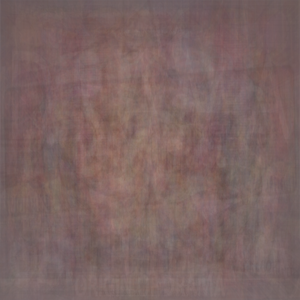

In [4]:
vectors["drama"].colorgram

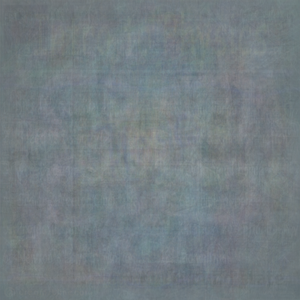

In [5]:
vectors["physics"].colorgram

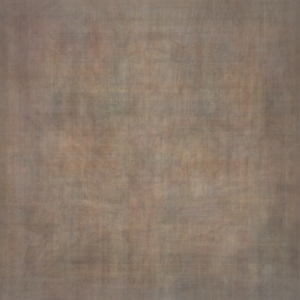

In [6]:
vectors["literature"].colorgram

To perform more advanced analysis of the categories and the relationships between them, we must combine analysis objects from each vector and calculate color distributions and entropys.

In [7]:
from compsyn.analysis import merge_vectors_to_image_analysis

image_analysis = merge_vectors_to_image_analysis([ vector for vector in vectors.values()])
image_analysis.compress_color_data()
image_analysis.entropy_computations()

[1639624527] (compsyn.merge_image_analysis)  INFO: merged ImageData from 7 WordToColorVector objects
[1639624532] (compsyn.ImageAnalysis)  INFO: literature is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: mathematics is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: poetry is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: dance is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: physics is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: drama is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: atlantis is being compressed.
[1639624533] (compsyn.ImageAnalysis)  INFO: performing entropy calculations


The above sets up what we need for the visualisations.

### Visualisations

In [8]:
from compsyn.visualisation import Visualisation

viz = Visualisation(image_analysis)

[1639624538] (compsyn.Visualisation)  INFO: saved figure /media/tasker/WDBlue-B/comp-syn/notebook_work_dir/figures/physics_full_dist.png


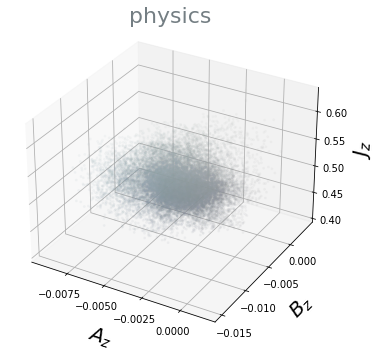

In [9]:
viz.jzazbz_color_distribution("physics")

[1639624538] (compsyn.Visualisation)  INFO: saved figure /media/tasker/WDBlue-B/comp-syn/notebook_work_dir/figures/Test_Words.png


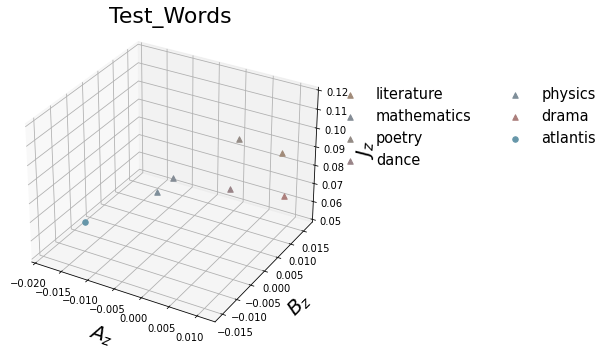

In [10]:
# complains about color value
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

viz.plot_labels_in_space()

[1639624538] (compsyn.Visualisation)  INFO: saved figure /media/tasker/WDBlue-B/comp-syn/notebook_work_dir/figures/test_dendrogram.png


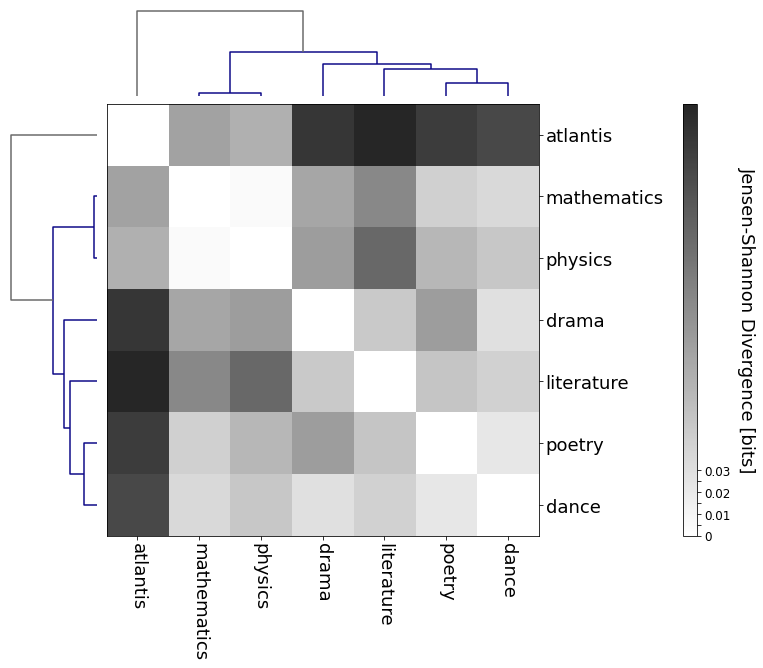

In [11]:
viz.cluster_analysis()

[1639624540] (compsyn.Visualisation)  INFO: saved figure /media/tasker/WDBlue-B/comp-syn/notebook_work_dir/figures/tSNE_all_colorgram.pdf


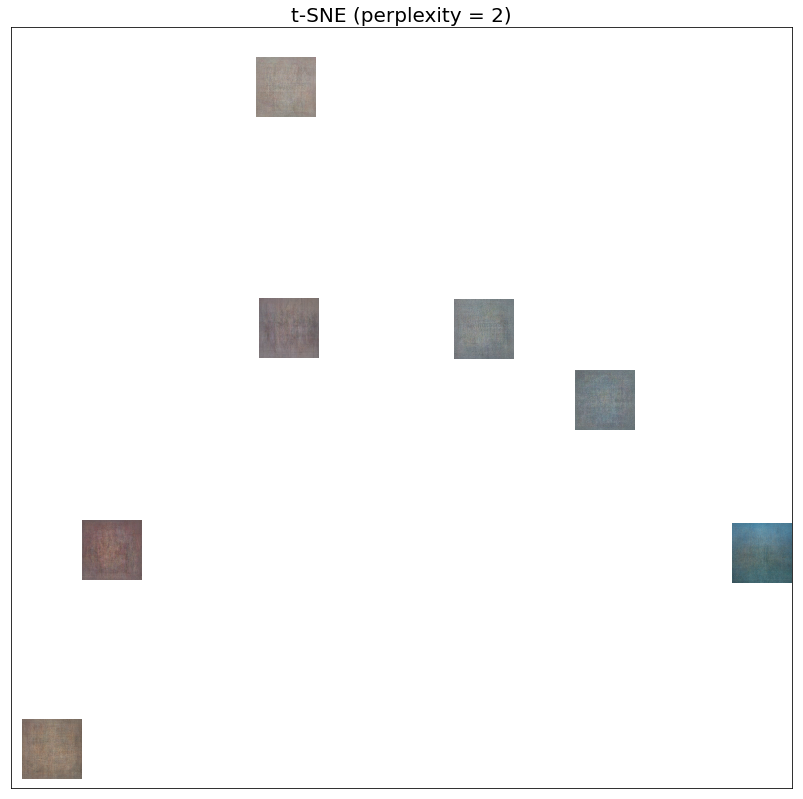

In [12]:
viz.plot_tsne()

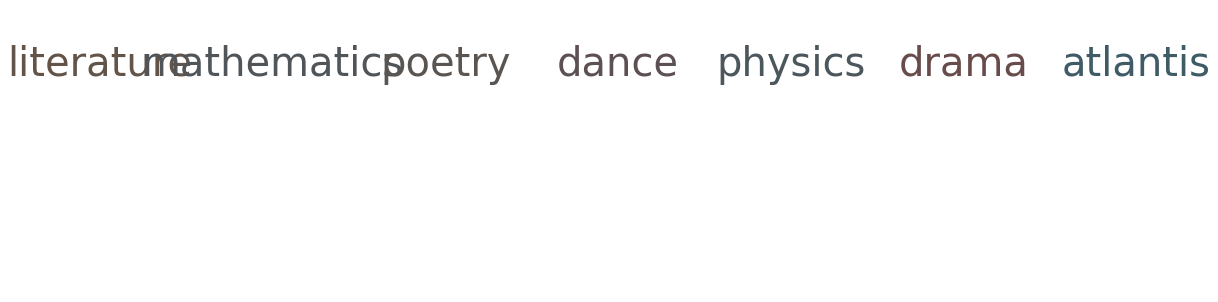

In [13]:
viz.plot_word_colors(word_distance=0.4, size=40)